<a href="https://colab.research.google.com/github/muthuram1980/New-repo1/blob/master/Indi_Face_Detection_with_OpenCV_Python_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1) Loading the required Python libraries**

In [0]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **2) Face Detection using the image baby1.png**

In [0]:
# Reading the image file
test_image1 = cv2.imread('gdrive/My Drive/BMS-Internship-Projects/Face-Detection-Project2/Face-Detection-in-Python-using-OpenCV/data/baby1.png')

In [0]:
# Converting the image file to grayscale image (As openCV expects detector takes the gray scale images as input)
test_image_gray1 = cv2.cvtColor(test_image1, cv2.COLOR_BGR2GRAY)

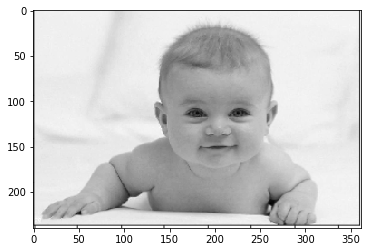

In [12]:
# Displaying the grayscale image
plt.imshow(test_image_gray1, cmap='gray')

Since we know that OpenCV loads an image in BGR format so we need to convert it into RBG format to be able to display its true colours. Let us write a small function for that.

In [0]:
# Function to convert image to RGB format
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Haar cascade files

OpenCV comes with a lot of pre-trained classsifiers. For instance there are classifiers for smile, eyes,face etc. These come in the form of xml files and are located in `opencv/data/haarcascades/` folder. However, just to make things simple, you can also access them from here.Download the xml fiels and place them in data folder in the same working directory as the jupyter notebook.

In [0]:
# Loading the classifier for frontal face
haar_cascade_face = cv2.CascadeClassifier('gdrive/My Drive/BMS-Internship-Projects/Face-Detection-Project2/Face-Detection-in-Python-using-OpenCV/data/haarcascades/haarcascade_frontalface_alt2.xml')


# Face detection

We shall be using the detectMultiscale module of the classifier.This function will return the co-ordinates(x and y posiiton plus the height and width) of the detected faces as Rect(x,y,w,h). 

In [15]:
# Face Detection
faces_rects1 = haar_cascade_face.detectMultiScale(test_image_gray1, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects1))

Faces found:  1


Our next step is to loop over all the co-ordinates it returned and draw rectangles around them using Open CV.We will be drawing a green rectangle with thicknessof 2

In [0]:
# Drawing the Rectangle over the face of the Image
for (x,y,w,h) in faces_rects1:
     cv2.rectangle(test_image1, (x, y), (x+w, y+h), (0, 255, 0), 2)
        

Finally, we shall display the original image in coloured to see if the face has been detected correctly or not.

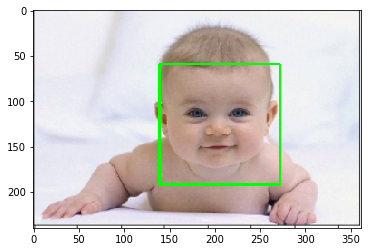

In [17]:
#convert image to RGB and show image with drawn Rectangle
plt.imshow(convertToRGB(test_image1))

## **2) Face Detection using the image baby2.png**

In [0]:
# Reading the image file
test_image2 = cv2.imread('gdrive/My Drive/BMS-Internship-Projects/Face-Detection-Project2/Face-Detection-in-Python-using-OpenCV/data/baby2.png')

In [0]:
# Converting the image file to grayscale image (As openCV expects detector takes the gray scale images as input)
test_image_gray2 = cv2.cvtColor(test_image2, cv2.COLOR_BGR2GRAY)

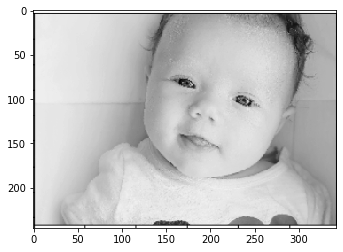

In [20]:
# Displaying grayscale image
plt.imshow(test_image_gray2, cmap='gray')

In [0]:
# Loading the classifier for frontal face
#haar_cascade_face = cv2.CascadeClassifier('gdrive/My Drive/BMS-Internship-Projects/Face-Detection-Project2/Face-Detection-in-Python-using-OpenCV/data/haarcascades/haarcascade_frontalface_alt2.xml')

In [22]:
faces_rects2 = haar_cascade_face.detectMultiScale(test_image_gray2, scaleFactor = 1.2, minNeighbors = 5);
# Let us print the no. of faces found
print('Faces found: ', len(faces_rects2))

Faces found:  0


In [0]:
# Drawing the Rectangle over the face of the Image
for (x,y,w,h) in faces_rects2:
     cv2.rectangle(test_image2, (x, y), (x+w, y+h), (0, 255, 0), 2)

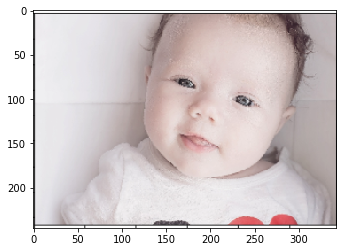

In [24]:
#convert image to RGB and show image
plt.imshow(convertToRGB(test_image2))

## **3) Face Detection using the image group.png**

In [0]:
#  Loading the image to be tested
test_image3 = cv2.imread('gdrive/My Drive/BMS-Internship-Projects/Face-Detection-Project2/Face-Detection-in-Python-using-OpenCV/data/group.png')

In [0]:
# Converting to grayscale as opencv expects detector takes in input gray scale images
test_image_gray3 = cv2.cvtColor(test_image3, cv2.COLOR_BGR2GRAY)

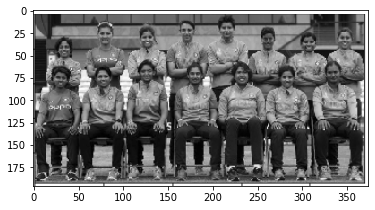

In [27]:
# Displaying grayscale image
plt.imshow(test_image_gray3, cmap='gray')

In [0]:
faces_rects3 = haar_cascade_face.detectMultiScale(test_image_gray3, scaleFactor = 1.2, minNeighbors = 5);
#faces_rect3 = cascade.detectMultiScale(test_image_gray3, scaleFactor=1.1, minNeighbors=5)

In [29]:
# Let us print the no. of faces found
print('Faces found: ', len(faces_rects3))

Faces found:  0


In [0]:
for (x,y,w,h) in faces_rects3:
     cv2.rectangle(test_image3, (x, y), (x+w, y+h), (0, 255, 0), 2)

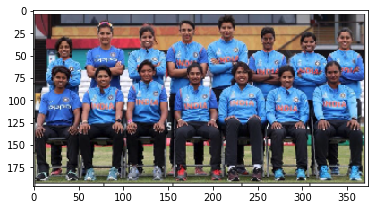

In [31]:
#convert image to RGB and show image
plt.imshow(convertToRGB(test_image3))

## **4) Generalised Function for Face Detection**

### Let us create a generalised function for the entire face detection process.

In [0]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return image_copy

###**a) Testing the function on the image "baby1.png"**

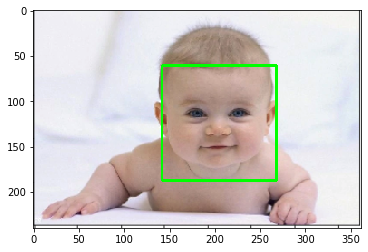

In [33]:
#loading image
#test_image2 = cv2.imread('baby2.jpg')
test_image1 = cv2.imread('gdrive/My Drive/BMS-Internship-Projects/Face-Detection-Project2/Face-Detection-in-Python-using-OpenCV/data/baby1.png')
#call the function to detect faces
faces1 = detect_faces(haar_cascade_face, test_image1)

#convert to RGB and display image
plt.imshow(convertToRGB(faces1))

### **b) Testing the function on the image "baby2.png"**




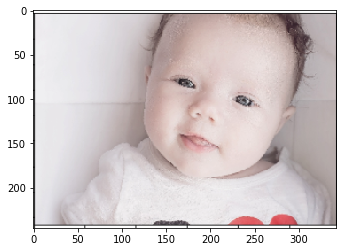

In [34]:
#loading image
#test_image2 = cv2.imread('baby2.jpg')
test_image2 = cv2.imread('gdrive/My Drive/BMS-Internship-Projects/Face-Detection-Project2/Face-Detection-in-Python-using-OpenCV/data/baby2.png')
#call the function to detect faces
faces2 = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces2))


### **c) Testing the function on a group photograph "group.png"**

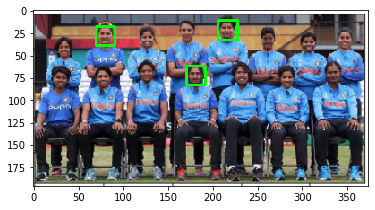

In [35]:
#loading image
#test_image2 = cv2.imread('group.jpg')
test_image3 = cv2.imread('gdrive/My Drive/BMS-Internship-Projects/Face-Detection-Project2/Face-Detection-in-Python-using-OpenCV/data/group.png')
#call the function to detect faces
faces3 = detect_faces(haar_cascade_face, test_image3)

#convert to RGB and display image
plt.imshow(convertToRGB(faces3))
